# Process Bursts

This notebook computes the burst drift for all bursts using the method show in `BurstDrift.ipynb`

In [1]:
#!/usr/bin/python3

from __future__ import division
import math
import os
import sys
import time
import numpy as np
import scipy.stats
from scipy.optimize import curve_fit
from math import log10
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import pi as nombrepi
from scipy import signal, ndimage
from tqdm import tqdm
from matplotlib import colors as mcolors
import functools
print = functools.partial(print, flush=True) # print doesn't happen til script ends so force it to flush... windows thing?
import pandas as pd
import corrfns

bursts = pd.read_csv('bursts.csv')

# Gaussian 2d Fit Stuff
# Source: https://gist.github.com/andrewgiessel/6122739
# Source: https://stackoverflow.com/questions/21566379/fitting-a-2d-gaussian-function-using-scipy-optimize-curve-fit-valueerror-and-m
def gaussian(height, center_x, center_y, width_x, width_y, rotation):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)

    rotation = np.deg2rad(rotation)
    center_x_old = center_x
    center_x = center_x * np.cos(rotation) - center_y * np.sin(rotation)
    center_y = center_x_old * np.sin(rotation) + center_y * np.cos(rotation)

    def rotgauss(x,y):
        xp = x * np.cos(rotation) - y * np.sin(rotation)
        yp = x * np.sin(rotation) + y * np.cos(rotation)
        g = height*np.exp( -(((center_x-xp)/width_x)**2  +((center_y-yp)/width_y)**2)/2.  )
        return g
    return rotgauss

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = np.indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = np.sqrt(abs((np.arange(col.size)-y)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = np.sqrt(abs((np.arange(row.size)-x)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y, 2.0

def twoD_Gaussian(point, amplitude, xo, yo, sigma_x, sigma_y, theta):
    x, y = point
    xo = float(xo)
    yo = float(yo)
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = (np.sin(2*theta))/(2*sigma_x**2) - (np.sin(2*theta))/(2*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = amplitude*np.exp( - a*((x-xo)**2) - b*(x-xo)*(y-yo) - c*((y-yo)**2))
    return g.ravel()

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: np.ravel(gaussian(*p)(*np.indices(data.shape)) - data)
    p, success = scipy.optimize.leastsq(errorfunction, params)
    return p, success

def fitgaussiannlsq(data, sigma=0):
    # use curve-fit (non-linear leastsq)
    x = range(0, 1023); y = range(0, 1023)
    x, y = np.meshgrid(x, y)
    params = moments(data)#+ (0.,)
    sigma = np.zeros(len(data.ravel())) + sigma
    popt, pcov = scipy.optimize.curve_fit(twoD_Gaussian, (x, y), corr.ravel(), p0=params, sigma=sigma, absolute_sigma=True)
    return popt, pcov

  0%|          | 0/24 [00:00<?, ?it/s]

processing 01_puppi_57747_C0531+33_0558_5.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...


B:\dev\sadtrombone\corrfns.py:52: ComplexWarning: Casting complex values to real discards the imaginary part
  temp_array_a[0:nx,:] = result_shifted[nx-1:2*nx-1,:]
B:\dev\sadtrombone\corrfns.py:53: ComplexWarning: Casting complex values to real discards the imaginary part
  temp_array_a[nx:2*nx-1,:] = result_shifted[0:nx-1,:]


solution nlsq: [1.81678443e+03 5.12499356e+02 5.12485033e+02 1.73991316e+02
 4.70716219e+01 1.71656458e+00]
parameter 1sigma: [1.16108696e-01 3.38499884e-03 1.10080159e-02 1.11402718e-02
 3.00692023e-03 2.63773339e-05]
reduced chisq: 9.733683241441026
solver angle: 1.7165645804224563 pos angle: 1.7165645804224563
drift: -1039.3594223692464
drift error: 0.19076700636321273
saved figures/burst_1_figure.png


  4%|▍         | 1/24 [00:18<07:10, 18.72s/it]

processing 02_puppi_57747_C0531+33_0558_1183.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...
solution nlsq: [ 81.49221057 512.49442555 512.4783396  177.67605797  44.62740083
   8.05717689]
parameter 1sigma: [0.03742787 0.02595439 0.0800134  0.08178352 0.02048607 0.00017409]
reduced chisq: 3.8184129607306407
solver angle: 8.057176893895857 pos angle: 8.057176893895857
drift: -740.5785704696756
drift error: 0.6523165260063905
saved figures/burst_2_figure.png


  8%|▊         | 2/24 [01:15<11:00, 30.03s/it]

processing 03_puppi_57747_C0531+33_0558_1202.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...
solution nlsq: [184.110978   512.4955582  512.35654137 170.31670446  19.22062972
   1.62478075]
parameter 1sigma: [5.70116864e-02 6.58744098e-03 5.26558409e-02 5.28221858e-02
 5.94991090e-03 5.00520838e-05]
reduced chisq: 4.049444686415699
solver angle: 1.6247807532384837 pos angle: 1.6247807532384837
drift: -2823.7705198758676
drift error: 2.623174493614193
saved figures/burst_3_figure.png


 12%|█▎        | 3/24 [01:46<10:38, 30.40s/it]

processing 04_puppi_57747_C0531+33_0558_25437.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...
solution nlsq: [  4.22626838 512.41515282 511.9855525  159.27981853 -26.21396121
   1.70809064]
parameter 1sigma: [0.04721219 0.37871931 1.76296043 1.78014039 0.29280727 0.0026723 ]
reduced chisq: 3.318849720955885
solver angle: 1.7080906442414951 pos angle: 1.7080906442414951
drift: -1104.4006747240599
drift error: 21.76861267493525
saved figures/burst_4_figure.png


 17%|█▋        | 4/24 [02:07<09:09, 27.46s/it]

processing 05_puppi_57747_C0531+33_0558_3683.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...
solution nlsq: [  5.53664047 512.46314379 512.82960322  37.31701138 166.62822244
   3.2137215 ]
parameter 1sigma: [0.03831274 0.27046185 1.14970562 0.25802189 1.15394809 0.00230597]
reduced chisq: 3.3607150489509667
solver angle: 3.2137215022244456 pos angle: 1.642925175429549
drift: -2111.820516323431
drift error: 67.74990880774595
saved figures/burst_5_figure.png


 21%|██        | 5/24 [02:27<08:00, 25.31s/it]

processing 06_puppi_57747_C0531+33_0558_3687.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...
solution nlsq: [151.9528511  512.48735247 512.39464578 157.1408889   12.43800254
   1.59600775]
parameter 1sigma: [6.31983202e-02 5.42754456e-03 6.53340904e-02 6.53849507e-02
 5.17305121e-03 4.68512303e-05]
reduced chisq: 6.719787668031635
solver angle: 1.5960077485923434 pos angle: 1.5960077485923434
drift: -6051.049456465338
drift error: 11.24963441543711
saved figures/burst_6_figure.png


 25%|██▌       | 6/24 [02:50<07:24, 24.71s/it]

processing 07_puppi_57747_C0531+33_0558_3688.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...
solution nlsq: [269.70713699 512.49599945 512.4839235  102.65223682  38.82269305
   1.719295  ]
parameter 1sigma: [0.05243157 0.00802666 0.01976641 0.01995446 0.00754703 0.00012133]
reduced chisq: 6.302707066972784
solver angle: 1.7192949953840102 pos angle: 1.7192949953840102
drift: -1019.9729354859584
drift error: 0.8457721388204364
saved figures/burst_7_figure.png


 29%|██▉       | 7/24 [03:11<06:42, 23.67s/it]

processing 08_puppi_57747_C0531+33_0558_3689.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...
solution nlsq: [246.10956198 512.4948832  512.49278784 171.61894454  64.50591015
   1.9922359 ]
parameter 1sigma: [2.81217339e-02 1.04672959e-02 1.81451271e-02 1.96190607e-02
 7.36969285e-03 7.07254458e-05]
reduced chisq: 6.1465695935494695
solver angle: 1.9922359032138204 pos angle: 1.9922359032138204
drift: -340.3697969410603
drift error: 0.06448979034795027
saved figures/burst_8_figure.png


 33%|███▎      | 8/24 [03:30<05:53, 22.06s/it]

processing 09_puppi_57747_C0531+33_0558_3690.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...
solution nlsq: [  3.55513763 512.31036773 512.36846051 133.4095558   89.61533044
   2.24302505]
parameter 1sigma: [0.027674   0.84619723 0.92173635 1.03877807 0.6975588  0.0134646 ]
reduced chisq: 3.3614157402505596
solver angle: 2.2430250457204077 pos angle: 2.2430250457204077
drift: -191.7202553232637
drift error: 5.297999433749957
saved figures/burst_9_figure.png


 38%|███▊      | 9/24 [03:47<05:11, 20.75s/it]

processing 10_puppi_57747_C0531+33_0558_12568.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...
solution nlsq: [  5.79253965 512.44504316 512.93472124 131.25659701  47.05622218
   1.75166966]
parameter 1sigma: [0.03920303 0.35152901 0.8748698  0.88750249 0.31830431 0.00393806]
reduced chisq: 3.375381323531603
solver angle: 1.7516696572861712 pos angle: 1.7516696572861712
drift: -834.3975894240446
drift error: 18.5692602792737
saved figures/burst_10_figure.png


 42%|████▏     | 10/24 [04:08<04:50, 20.73s/it]

processing 11_puppi_57748_C0531+33_0594_2.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...
solution nlsq: [ 11.93446074 512.5069775  512.32558654 182.95926957  39.53136536
   1.71771527]
parameter 1sigma: [0.03667938 0.14555499 0.55634095 0.56441972 0.12138151 0.00098472]
reduced chisq: 3.3629975699147914
solver angle: 1.7177152741347952 pos angle: 1.7177152741347952
drift: -1031.1020557401926
drift error: 7.0113614595754346
saved figures/burst_11_figure.png


 46%|████▌     | 11/24 [04:28<04:28, 20.62s/it]

processing 12_puppi_57748_C0531+33_0594_48.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...
solution nlsq: [ 82.33868258 512.49918806 512.45491869 138.59078866  28.58861848
   4.86193128]
parameter 1sigma: [0.04324331 0.01838275 0.07199874 0.07277796 0.01501277 0.00016002]
reduced chisq: 3.9157099283188574
solver angle: 4.861931275436998 pos angle: 4.861931275436998
drift: -1012.7486366519815
drift error: 1.1000009303116243
saved figures/burst_12_figure.png


 50%|█████     | 12/24 [04:52<04:18, 21.54s/it]

processing 13_puppi_57748_C0531+33_0594_49.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...
solution nlsq: [927.14867988 512.4990735  512.46853852 141.84529948  40.4367131
   1.73595691]
parameter 1sigma: [7.70871386e-02 3.84156241e-03 1.16460566e-02 1.17939220e-02
 3.36206903e-03 3.64859110e-05]
reduced chisq: 11.238787212802604
solver angle: 1.735956905187487 pos angle: 1.735956905187487
drift: -915.4601585778304
drift error: 0.20596098874312088
saved figures/burst_13_figure.png


 54%|█████▍    | 13/24 [05:10<03:46, 20.59s/it]

processing 14_puppi_57748_C0531+33_0594_50.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...
solution nlsq: [327.57976    512.49722162 512.15839305 160.73610386  11.4305252
  -1.52663369]
parameter 1sigma: [6.85245216e-02 2.81213956e-03 3.35887681e-02 3.36442885e-02
 2.39080368e-03 2.11434169e-05]
reduced chisq: 4.744576466517902
solver angle: -1.5266336888355183 pos angle: -1.5266336888355183
drift: -3452.888808728977
drift error: 1.6552652073966305
saved figures/burst_14_figure.png


 58%|█████▊    | 14/24 [05:36<03:40, 22.06s/it]

processing 15_puppi_57748_C0531+33_0594_1269.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...
solution nlsq: [520.61694001 512.48452827 512.48980406  65.74027771  47.59690267
   1.99202443]
parameter 1sigma: [0.06249716 0.00613207 0.00757179 0.00789215 0.00571386 0.00025831]
reduced chisq: 15.555409928570564
solver angle: 1.9920244252887647 pos angle: 1.9920244252887647
drift: -340.5627204878234
drift error: 0.2357583268813212
saved figures/burst_15_figure.png


 62%|██████▎   | 15/24 [05:59<03:21, 22.44s/it]

processing 16_puppi_57772_C0531+33_0007_2695.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...
solution nlsq: [2.59137213e+03 5.12498935e+02 5.12490100e+02 1.25261119e+02
 4.64706804e+01 1.70492369e+00]
parameter 1sigma: [6.08121050e-02 1.15000003e-03 2.91669943e-03 2.93945790e-03
 1.09052825e-03 1.42775387e-05]
reduced chisq: 159.81992153989208
solver angle: 1.704923694008454 pos angle: 1.704923694008454
drift: -1130.80401175578
drift error: 0.12182727237947398
saved figures/burst_16_figure.png


 67%|██████▋   | 16/24 [06:18<02:49, 21.21s/it]

processing gajjar/11A_16sec.calib.4p.RM.scr.ASCII
processing gajjar/11D_323sec.calib.4p.RM.scr.ASCII
processing chime_low
processing 11_puppi_57748_C0531+33_0594_2.dm559.72.calibP.RM.DD.ASCII
processing 11_puppi_57748_C0531+33_0594_2.dm559.72.calibP.RM.DD.ASCII
processing 11_puppi_57748_C0531+33_0594_2.dm559.72.calibP.RM.DD.ASCII
processing 11_puppi_57748_C0531+33_0594_2.dm559.72.calibP.RM.DD.ASCII
processing 11_puppi_57748_C0531+33_0594_2.dm559.72.calibP.RM.DD.ASCII


100%|██████████| 24/24 [06:18<00:00, 15.76s/it]


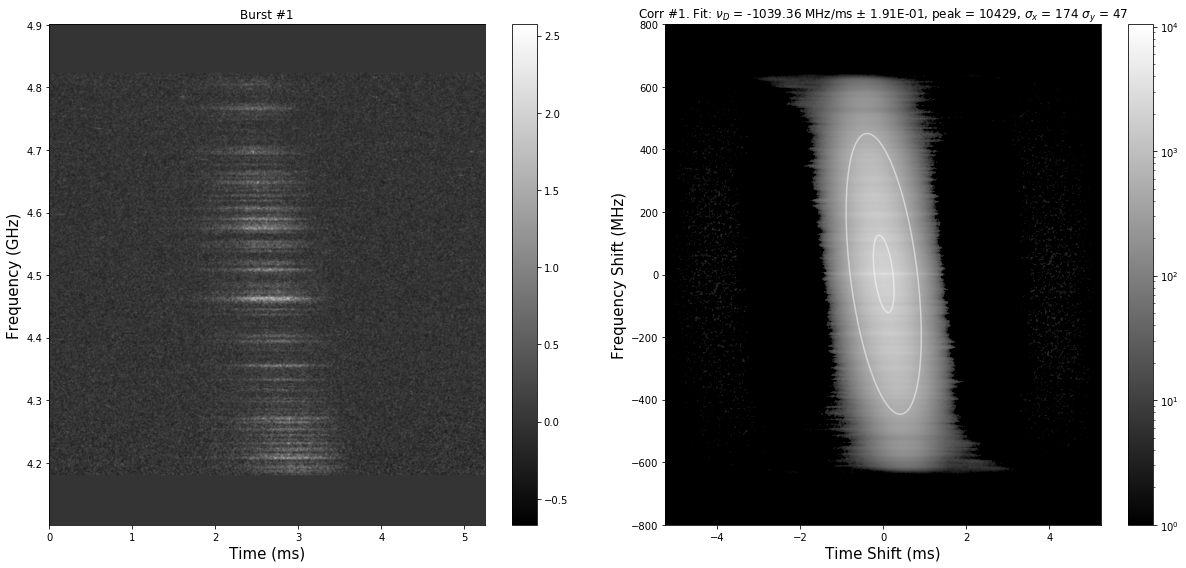

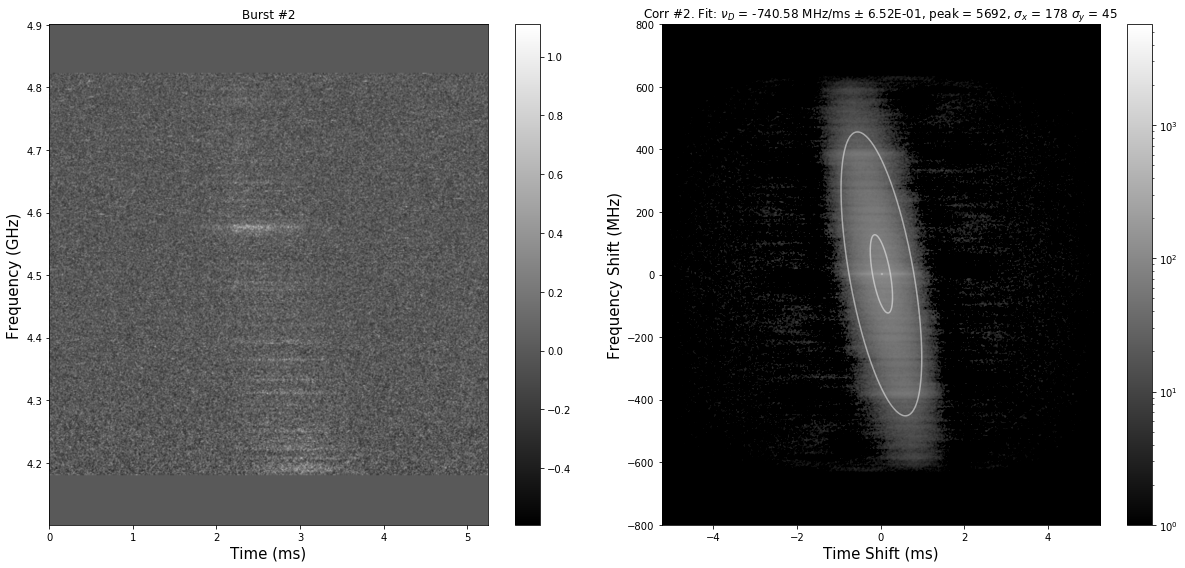

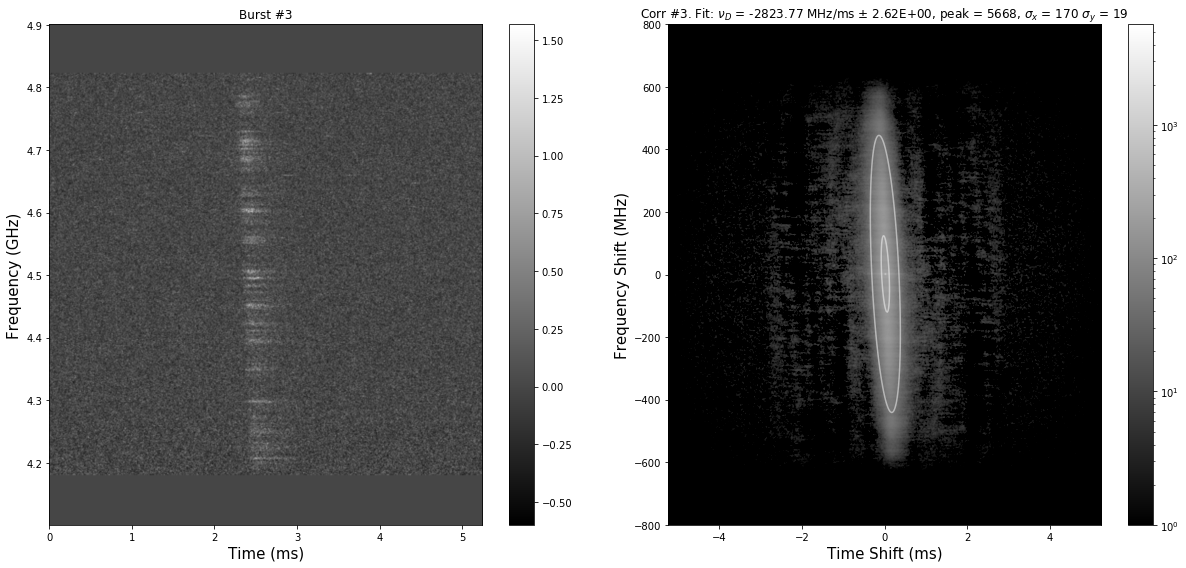

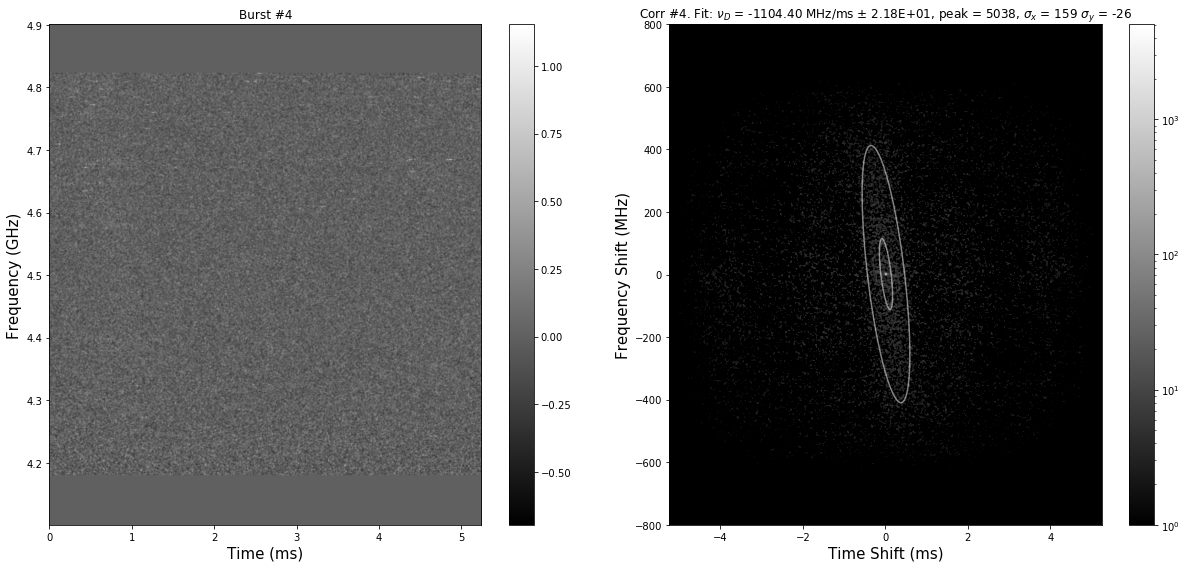

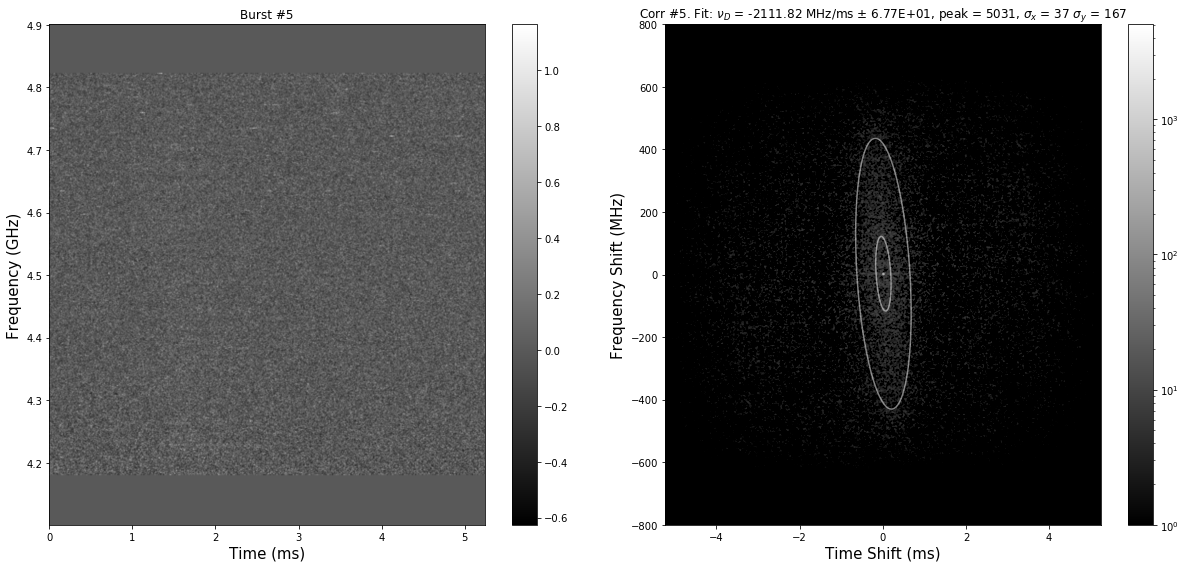

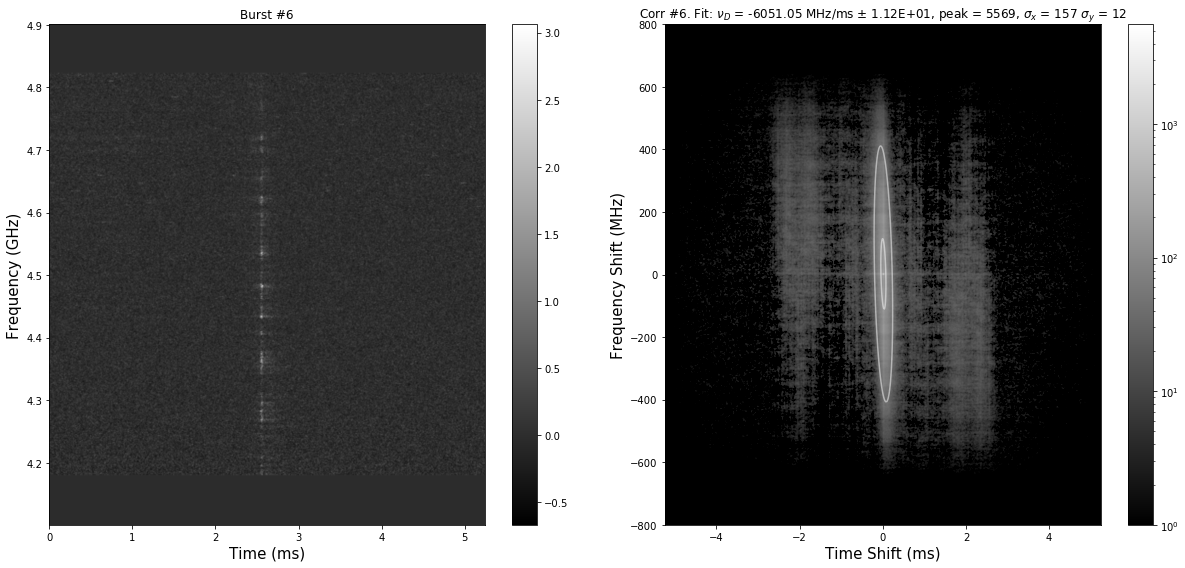

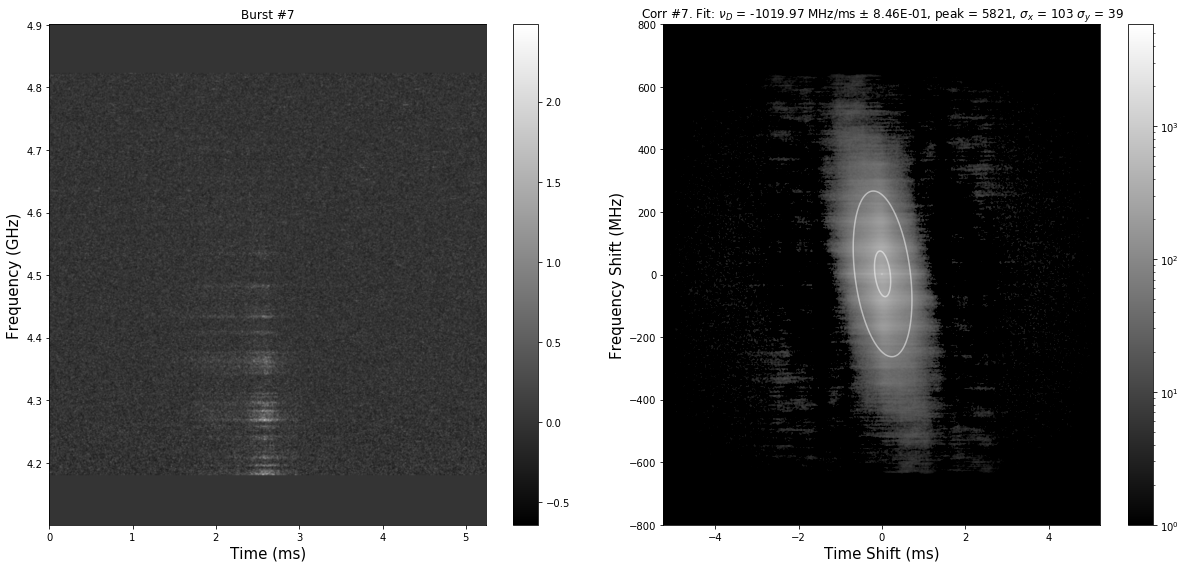

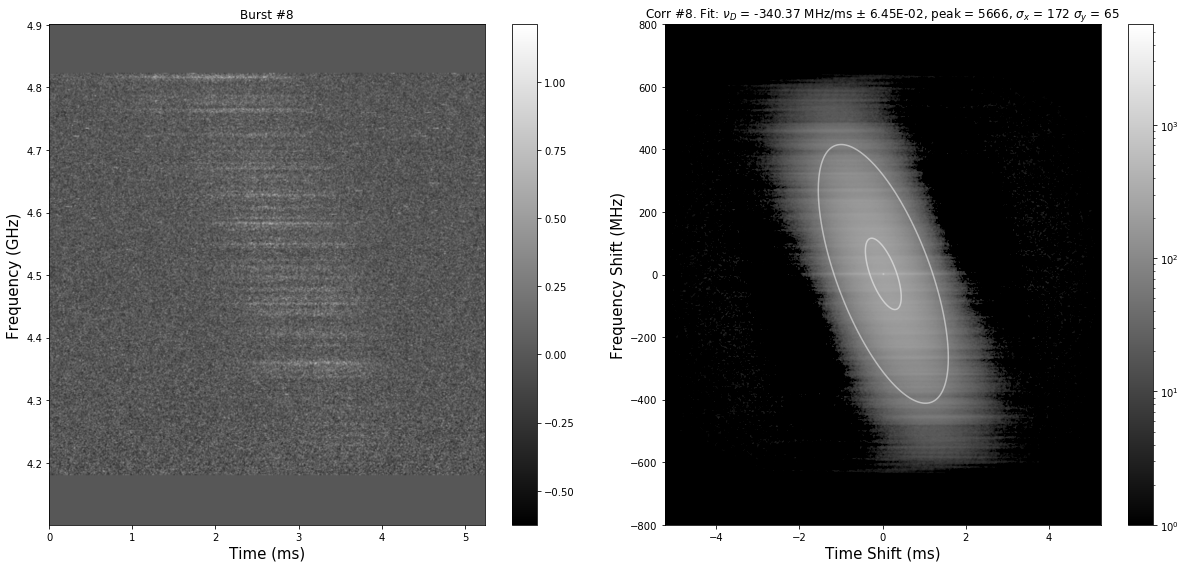

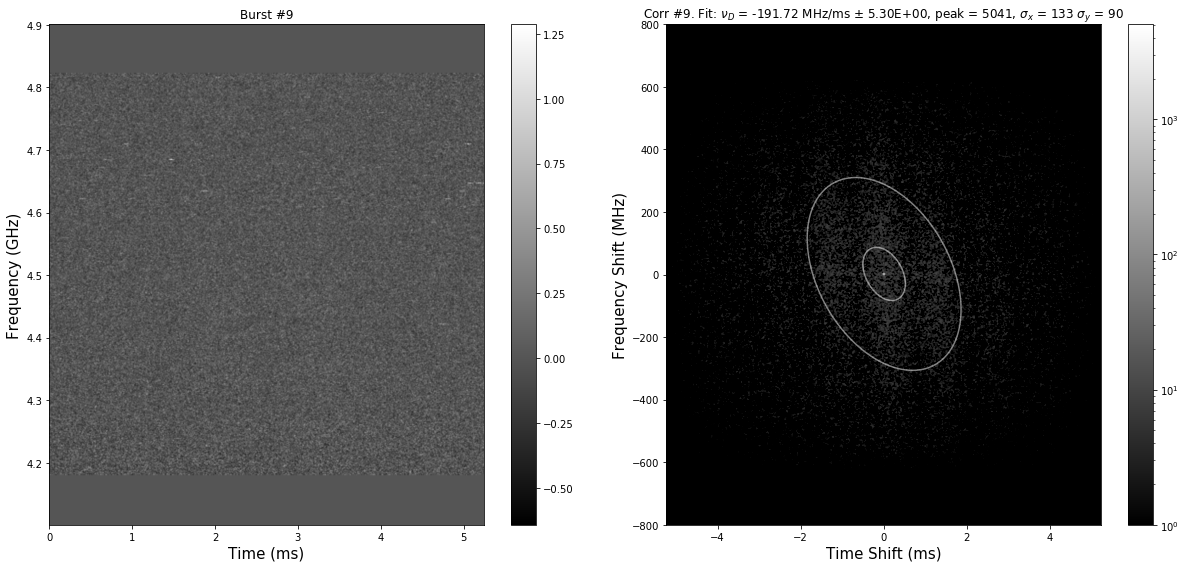

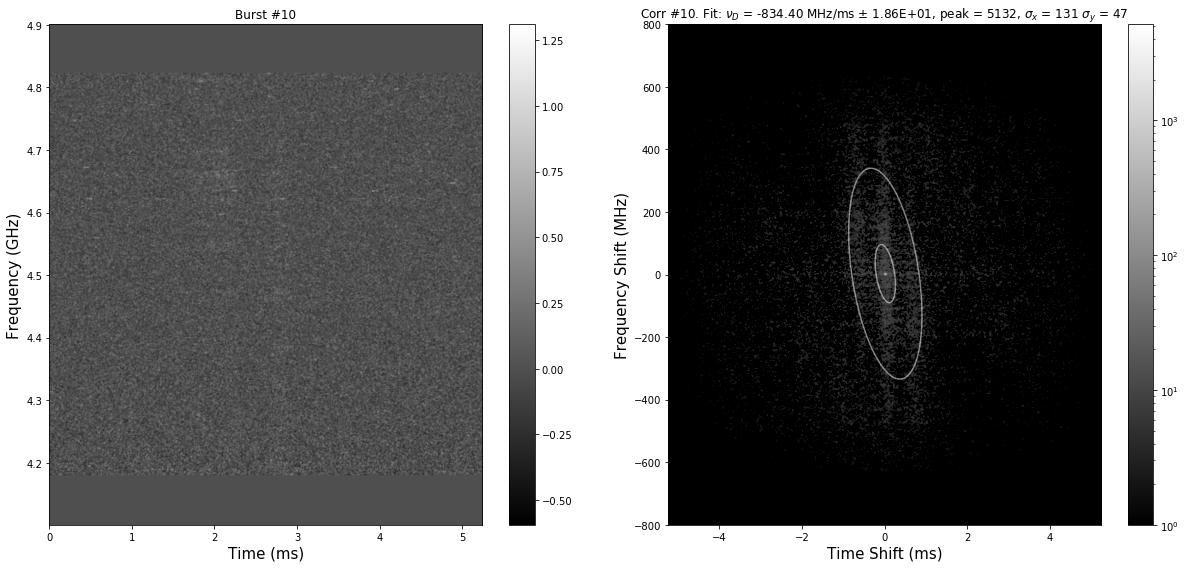

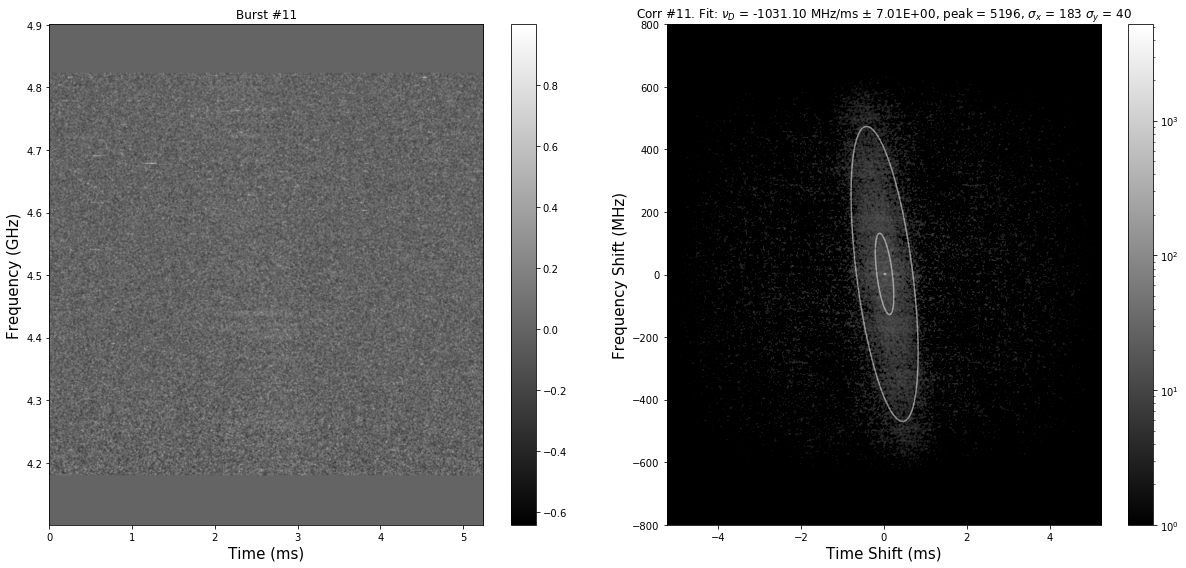

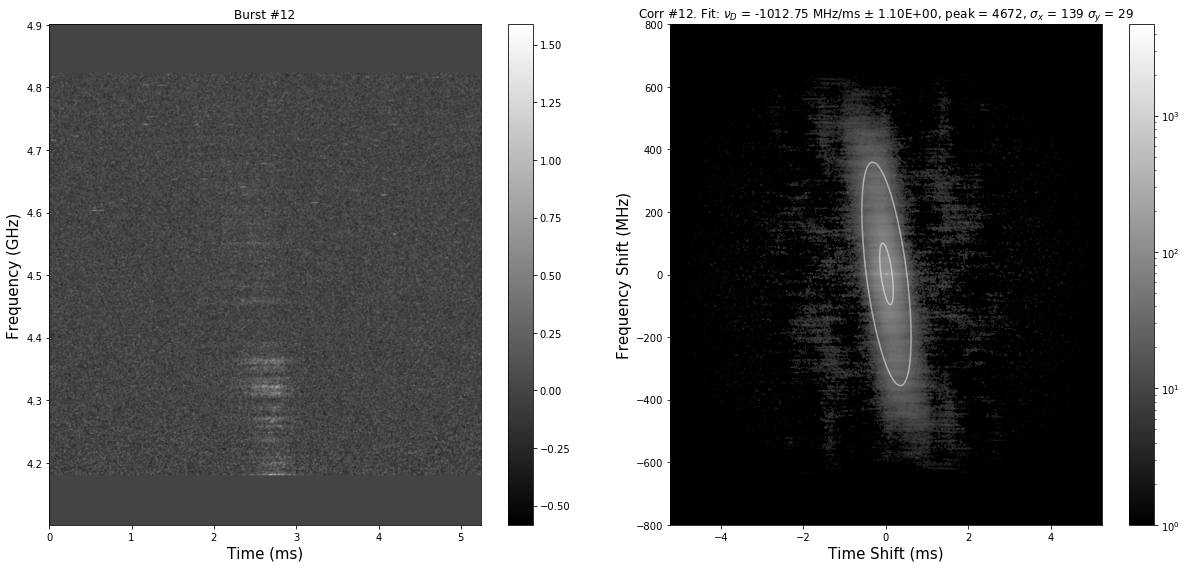

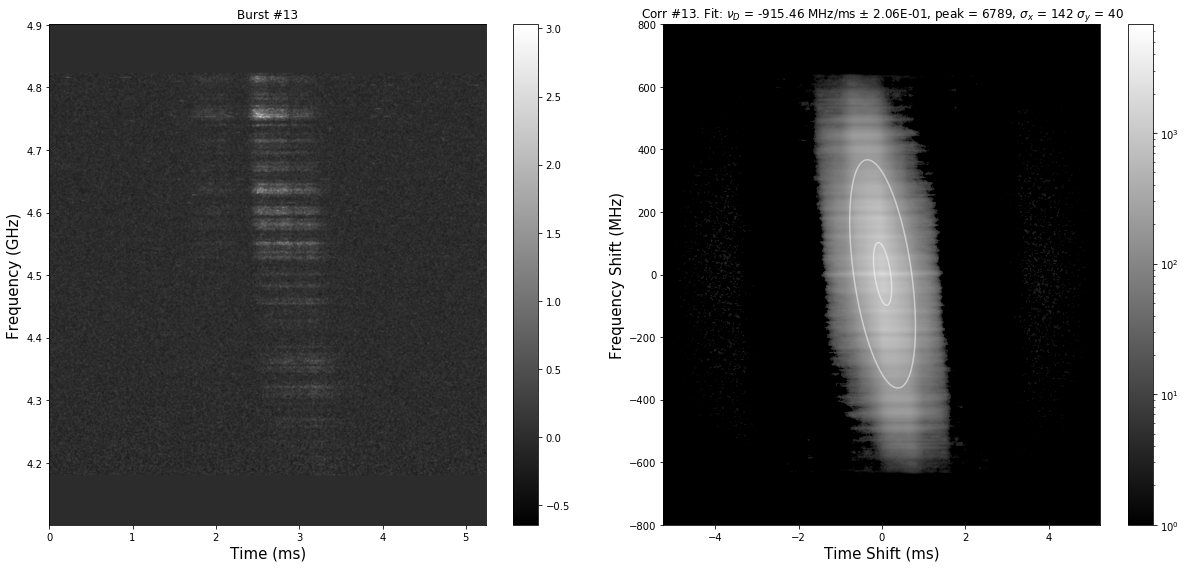

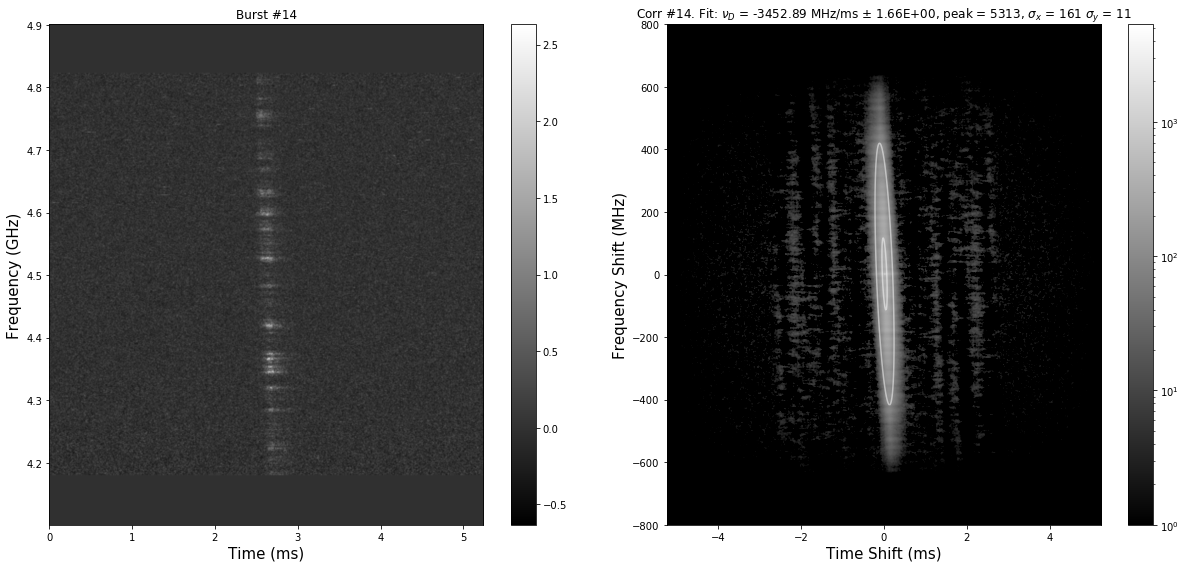

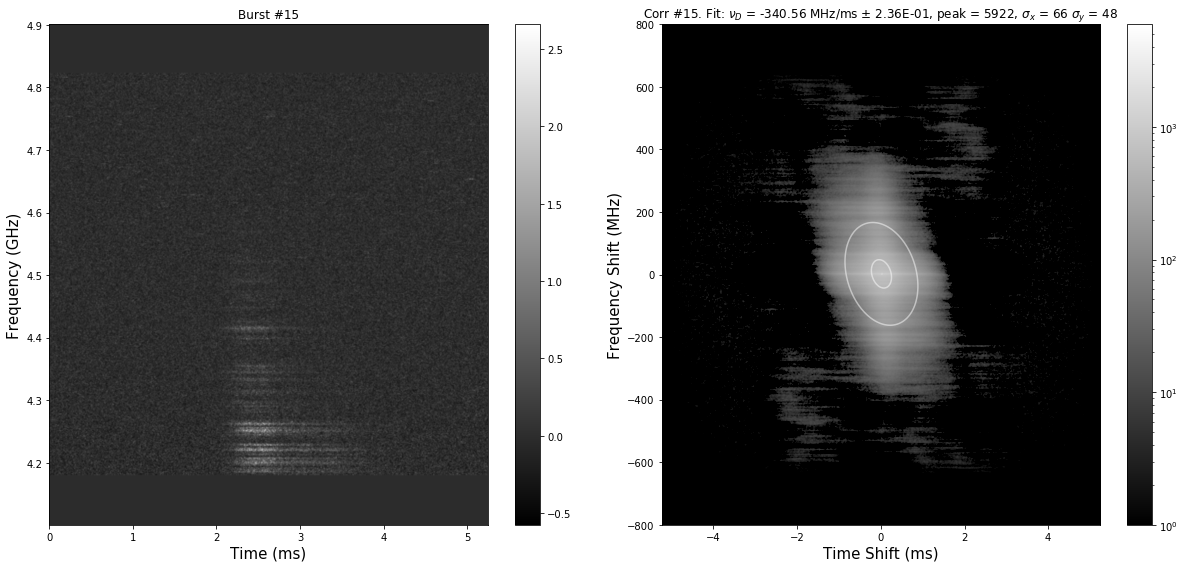

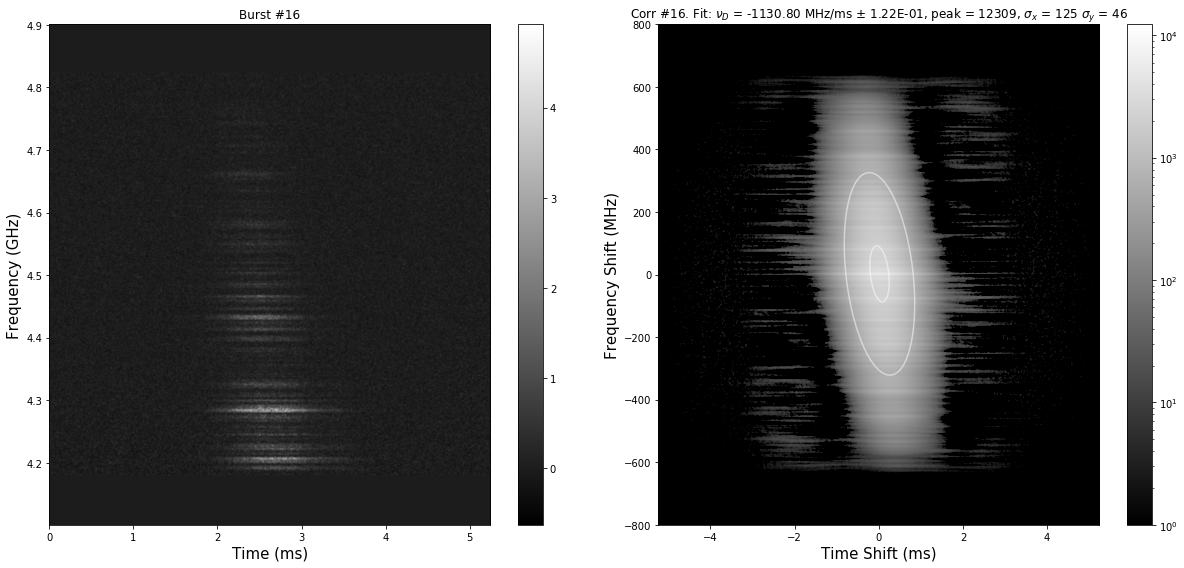

In [2]:
folder = 'data'
outfolder = 'figures'
sigmax_error = []
sigmay_error = []
angle_error  = []
drift_errors = []
drifts       = []
autocorrs    = []
auto_sigmas  = []
red_chisqs   = []
corredges = [(10, 300),
             (10, 300),
             (10, 300),
             (10, 300),
             (10, 300),
             (10, 250),
             (10, 300),
             (10, 250),
             (10, 300),
             (10, 300),
             (10, 300),
             (10, 300),
             (10, 300),
             (10, 300),
             (10, 300),
             (10, 300)]
for burst, filename, edge in tqdm( zip(range(1, len(bursts['filename'])+1), bursts['filename'], bursts['edge']), total=len(bursts['filename']) ):
    print('processing {}'.format(filename))
    if 'gajjar' in filename:
        continue
    if burst > 16:  continue

    #junk, nchan, nbin, I, Q, U, V = np.loadtxt('{}/{}'.format(folder, filename), delimiter=' ', unpack=True)
    #Q, U, V = None, None, None
    
    junk, nchan, nbin, I = [], [], [], []
    with open('{}/{}'.format(folder, filename)) as infile:
        for line in infile:
            junki, nchani, nbini, Ii, _, _, _ = line.split(' ')
            junk.append(junki)
            nchan.append(nchani)
            nbin.append(nbini)
            I.append(Ii)
    junk  = np.array(junk, dtype=float)
    nchan = np.array(nchan, dtype=float)
    nbin  = np.array(nbin, dtype=float)
    I     = np.array(I, dtype=float)
    
    n = len(junk)
    edge = int(edge)
    print("Data loaded")
    
    binmax = int(nbin[n-1])+1
    frequencymax = (int(nchan[n-1])+1)
    intensity = np.zeros((frequencymax, binmax))

    X = np.zeros(binmax)
    Y = np.zeros(frequencymax)

    # what are these?
    tmin = 500 
    tmax = 1500

    #### 1. remove noise
    intensitynoise1 = np.zeros(tmin-1)
    intensitynoise2 = np.zeros(binmax-tmax)
    for i in tqdm(range(frequencymax-50,51,-1), desc='noise removal', disable=True):

        Y[i-1] = 4.15 + (i-1) * 1.5625 # ?

        for j in range(1,tmin) :

            intensitynoise1[j-1] = (I[j-1 + binmax*(frequencymax-i)])/(tmin-1)


        for j in range(tmax+1,binmax+1) :

            intensitynoise2[j-1-tmax] = (I[j-1 + binmax*(frequencymax-i)])/(binmax-tmax)

        a = sum(intensitynoise1)
        b = sum(intensitynoise2)

        for j in range(1,binmax+1) :
            X[j-1] = j-1
            intensity[i-1,j-1] = I[j-1 + binmax*(frequencymax-i)] - (a+b)/2

    #### 2. find autocorrelation 
    burstwindow = intensity[:,edge:edge+frequencymax]
    print("finding auto-correlation...")
    #corr = signal.correlate2d(burstwindow, burstwindow, mode='full')
    #print(corr.shape)
    corr = corrfns.auto_corr2D_viafft(burstwindow)
   
    #### 2.5 Autocorr noise
    autocorr_sigma = np.std( corr[:, corredges[burst-1][0]:corredges[burst-1][1]] )
    auto_sigmas.append(autocorr_sigma)

    #### 3. Fit Gaussian to autocorrelation
    print("finding fit...")
    popt, pcov = fitgaussiannlsq(corr, sigma=autocorr_sigma)
    perr = np.sqrt(np.diag(pcov))
    x = range(0, 1023); y = range(0, 1023)
    x, y = np.meshgrid(x, y)
    fitmap2 = twoD_Gaussian((x, y), *popt).reshape(1023, 1023)
    print('solution nlsq:', popt)
    print('parameter 1sigma:', perr)
    
    # calculate reduced chisquared
    residuals = corr - fitmap2
    chisq = np.sum((residuals / autocorr_sigma) ** 2)
    red_chisq = chisq / (corr.shape[0]*corr.shape[1] - len(popt)) # this is chisq/(M-N)
    red_chisqs.append(red_chisq)
    print('reduced chisq:', red_chisq)
    
    ### 3.5 Compute drift and error
    theta = popt[-1] if popt[3] > popt[4] else popt[-1] - np.pi/2
    print('solver angle:', popt[-1], 'pos angle:', theta)
    slope = np.tan(theta)
    drift = 1.5625/0.01024 * slope # MHz/ms
    drift_error = (1.5625/0.01024) * (perr[-1] * (1/np.cos(theta))**2)
    sigmax_error.append(perr[3])
    sigmay_error.append(perr[4])
    angle_error.append(perr[5])
    drift_errors.append(drift_error)  
    drifts.append(drift)       
    print('drift:', drift)
    print('drift error:', drift_error)
    
    #### 4. Plot
    cmap = plt.get_cmap('gray')
    cmap.set_bad(color = 'k', alpha = 1.) # potentially hides important errors in the data!

    plt.figure(figsize=(17,8))
    plt.subplot(121)
    plt.title("Burst #{}".format(burst))
    burstextents = [0, 
           10.24e-6 * burstwindow.shape[-1] * 1e3, 
           4100.78125 * 1e-3, 
           (4100.78125 + 1.5625*burstwindow.shape[-2]) * 1e-3]
    plt.imshow(burstwindow, cmap=cmap, interpolation='bicubic',aspect='auto', origin="lower", extent=burstextents)
    plt.xlabel("Time (ms)", size=15)
    plt.ylabel("Frequency (GHz)", size=15)
    plt.colorbar()

    plt.subplot(122)
    plt.title("Corr #{}. Fit: $\\nu_D$ = {:.2f} MHz/ms $\pm$ {:.2E}, peak = {:.0f}, $\sigma_x$ = {:.0f} $\sigma_y$ = {:.0f}".format(burst, drift, drift_error, np.max(corr), popt[3], popt[4]))

    corrextents = [-10.24e-6 * (corr.shape[1]/2) * 1e3, 
           10.24e-6 * (corr.shape[1]/2) * 1e3 , 
           (4100.78125 -  (2*4100.78125 + 1.5625*burstwindow.shape[0])/2 )*2, 
           ((4100.78125 + 1.5625*burstwindow.shape[-2]) -  (2*4100.78125 + 1.5625*burstwindow.shape[0])/2 )*2]
    #plt.imshow(corr, cmap=cmap, interpolation='bicubic',aspect='auto', origin="lower") # linear scale
    #plt.clim(0, np.max(corr)/10)
    plt.imshow(corr, cmap=cmap, interpolation='bicubic', aspect='auto', origin="lower", norm=mcolors.LogNorm(vmin=1), extent=corrextents)
    plt.xlabel("Time Shift (ms)", size=15)
    plt.ylabel("Frequency Shift (MHz)", size=15)
    plt.colorbar()
    
    plt.contour(fitmap2, [popt[0]/4, popt[0]*0.9], colors='w', alpha=0.5, origin='lower', extent=corrextents)

    plt.tight_layout()
    # plt.savefig('{}/burst_{}_figure.png'.format(outfolder, burst))
    print('saved {}/burst_{}_figure.png'.format(outfolder, burst))

In [3]:
red_chisqs

[9.733683241441026,
 3.8184129607306407,
 4.049444686415699,
 3.318849720955885,
 3.3607150489509667,
 6.719787668031635,
 6.302707066972784,
 6.1465695935494695,
 3.3614157402505596,
 3.375381323531603,
 3.3629975699147914,
 3.9157099283188574,
 11.238787212802604,
 4.744576466517902,
 15.555409928570564,
 159.81992153989208]

[111.48222725470062,
 6.749708479459105,
 7.793460963473907,
 3.246709336058745,
 3.2250095103092544,
 3.9144321659667836,
 5.526043142433374,
 9.157308395680246,
 3.218699593900001,
 3.290370671709115,
 3.4115435044866764,
 4.053156380451369,
 31.95620389349233,
 9.048346578597009,
 4.599277250304015,
 73.59034980033088]

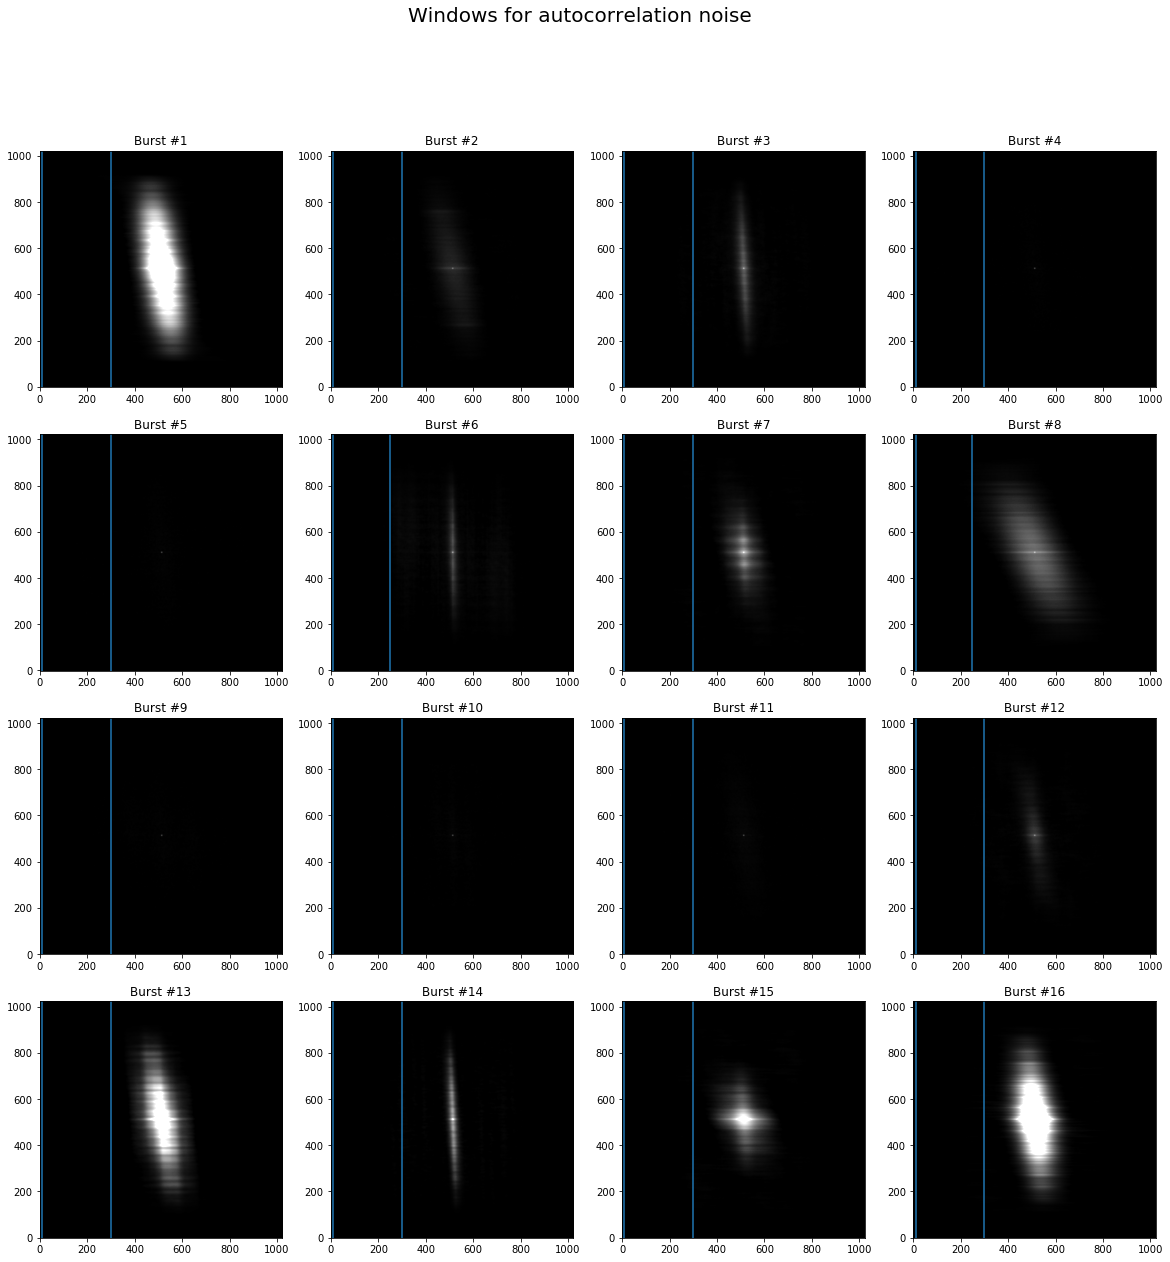

In [9]:
## Autocorrelation Noise Windows
titles = ["Burst #{}".format(x) for x in list(range(1, 17))]
corredges = [(10, 300),
             (10, 300),
             (10, 300),
             (10, 300),
             (10, 300),
             (10, 250),
             (10, 300),
             (10, 250),
             (10, 300),
             (10, 300),
             (10, 300),
             (10, 300),
             (10, 300),
             (10, 300),
             (10, 300),
             (10, 300)]
sigmas = []

plt.figure(figsize=(20, 20))
plt.suptitle('Windows for autocorrelation noise', size=20)
for title, ac, corredge in zip(titles, autocorrs, corredges):
    plt.subplot(4, 4, titles.index(title)+1)
    plt.title(title)
    plt.imshow(ac, aspect='auto', interpolation='bicubic', origin='lower', cmap='gray')
    plt.axvline(x=corredge[0]); plt.axvline(x=corredge[1])
    plt.clim(0, np.max(ac)/10)

    sigmas.append(np.std(ac[corredge[0]:corredge[1]]))

# slice ex.:
# plt.imshow(autocorrs[0][:,corredges[0][0]:corredges[0][1]], aspect='auto', interpolation='bicubic', origin='lower', cmap='gray')
# plt.clim(0, np.max(autocorrs[0])/10)
    
sigmas

In [5]:
# Export parameter errors
bursts = bursts.head(16)
bursts['sigmax_error'] = sigmax_error 
bursts['sigmay_error'] = sigmay_error 
bursts['angle_error']  = angle_error  
bursts['red_chisq']    = red_chisqs
bursts['drift_errors_raw'] = drift_errors  
bursts['drifts_raw'] = drifts  
# bursts['sigmax_raw'] = sigmax 
# bursts['sigmay_raw'] = drifts 

params = bursts[['name', 'sigmax_error', 'sigmay_error', 'angle_error', 'red_chisq', 'drift_errors_raw', 'drifts_raw']]
params.to_csv('params_temp.csv')
params

name  sigmax_error  sigmay_error  angle_error   red_chisq  \
0    M1      0.011140      0.003007     0.000026    9.733683   
1    M2      0.081784      0.020486     0.000174    3.818413   
2    M3      0.052822      0.005950     0.000050    4.049445   
3    M4      1.780140      0.292807     0.002672    3.318850   
4    M5      0.258022      1.153948     0.002306    3.360715   
5    M6      0.065385      0.005173     0.000047    6.719788   
6    M7      0.019954      0.007547     0.000121    6.302707   
7    M8      0.019619      0.007370     0.000071    6.146570   
8    M9      1.038778      0.697559     0.013465    3.361416   
9   M10      0.887502      0.318304     0.003938    3.375381   
10  M11      0.564420      0.121382     0.000985    3.362998   
11  M12      0.072778      0.015013     0.000160    3.915710   
12  M13      0.011794      0.003362     0.000036   11.238787   
13  M14      0.033644      0.002391     0.000021    4.744576   
14  M15      0.007892      0.005714     0.000258   15.555410   
15  M16      0.002939      0.001091     0.000014  159.819922   

    drift_errors_raw   drifts_raw  
0           0.190767 -1039.359422  
1           0.652317  -740.578570  
2           2.623174 -2823.770520  
3          21.768613 -1104.400675  
4          67.749909 -2111.820516  
5          11.249634 -6051.049456  
6           0.845772 -1019.972935  
7           0.064490  -340.369797  
8           5.297999  -191.720255  
9          18.569260  -834.397589  
10          7.011361 -1031.102056  
11          1.100001 -1012.748637  
12          0.205961  -915.460159  
13          1.655265 -3452.888809  
14          0.235758  -340.562720  
15          0.121827 -1130.804012

In [ ]:
cmap = plt.get_cmap('PiYG')
cmap.set_bad(color = 'k', alpha = 1.) # potentially hides important errors in the data!

plt.figure(figsize=(17,8))
plt.subplot(121)
plt.title("Burst #{}".format(burst))
burstextents = [0, 
       10.24e-6 * burstwindow.shape[-1] * 1e3, 
       4100.78125 * 1e-3, 
       (4100.78125 + 1.5625*burstwindow.shape[-2]) * 1e-3]
plt.imshow(burstwindow, cmap=cmap, interpolation='bicubic',aspect='auto', origin="lower", extent=burstextents)
plt.xlabel("Time (ms)", size=15)
plt.ylabel("Frequency (GHz)", size=15)
plt.clim(0, 0.3)
print(np.median(burstwindow))
plt.colorbar()

plt.subplot(122)
plt.title("Corr #{}. Fit: $\\nu_D$ = {:.2f} MHz/ms $\pm$ {:.2E}, peak = {:.0f}, $\sigma_x$ = {:.0f} $\sigma_y$ = {:.0f}".format(burst, drift, drift_error, np.max(corr), popt[3], popt[4]))
# plt.imshow(corr, cmap=cmap, interpolation='bicubic',aspect='auto', origin="lower") # linear scale
# plt.clim(0, np.max(corr)/2)
corrextents = [-10.24e-6 * (corr.shape[1]/2) * 1e3, 
       10.24e-6 * (corr.shape[1]/2) * 1e3 , 
       (4100.78125 -  (2*4100.78125 + 1.5625*burstwindow.shape[0])/2 )*2, 
       ((4100.78125 + 1.5625*burstwindow.shape[-2]) -  (2*4100.78125 + 1.5625*burstwindow.shape[0])/2 )*2]
plt.imshow(corr, cmap=cmap, interpolation='bicubic', aspect='auto', origin="lower", norm=mcolors.LogNorm(vmin=1), extent=corrextents)
plt.xlabel("Time Shift (ms)", size=15)
plt.ylabel("Frequency Shift (MHz)", size=15)
plt.colorbar()

plt.contour(fitmap2, [popt[0]/4, popt[0]*0.9], colors='w', alpha=0.5, origin='lower', extent=corrextents)

plt.tight_layout()

In [ ]:
plt.figure(figsize=(10,10))
cmap = plt.get_cmap('gray')
cmap.set_bad(color = 'k', alpha = 1.)
plt.imshow(corr, cmap=cmap, interpolation='bicubic', aspect='auto', origin="lower", norm=mcolors.LogNorm(vmin=1))
print(np.max(corr), np.min(corr))
# linear cmap
# plt.imshow(corr, cmap=cmap, interpolation='bicubic', aspect='auto', origin="lower")
# plt.clim(0, np.max(corr)/2)

plt.colorbar()


In [ ]:
cmap = "gray"
x = range(0, 1023); y = range(0, 1023)
x, y = np.meshgrid(x, y)
# amplitude, xo, yo, sigma_x, sigma_y, theta
testmap = twoD_Gaussian((x, y), *[1.8e+03, 5.11e+02, 5.11e+02, 1.74e+02, 4.7e+01, 1.425]).reshape(1023, 1023)
popt = [1.8e+03, 5.11e+02, 5.11e+02, 1.74e+02, 4.7e+01, 1.425]

plt.figure(figsize=(10,8))
plt.title("Correlation #{}. Fit: $\\theta$ = {:.2f} rad, peak = {:.0f}, $\sigma_x$ = {} $\sigma_y$ = {}".format(burst, popt[-1], 1000, 1, 1))
print(burstwindow.shape)
burstextents = [0, 
           10.24e-6 * burstwindow.shape[-1] * 1e3, 
           4100.78125 * 1e-3, 
           (4100.78125 + 1.5625*burstwindow.shape[-2]) * 1e-3]

plt.imshow(burstwindow, cmap=cmap, interpolation='bicubic',aspect='auto', origin="lower", extent=burstextents)
plt.xlabel("Time (ms)", size=20)
plt.ylabel("Frequency (GHz)", size=20)
plt.colorbar()


In [ ]:
x = range(0, 1023); y = range(0, 1023)
x, y = np.meshgrid(x, y)
popt = [1,2,3,4,5,6]; burst = 1
fitmap2 = twoD_Gaussian((x, y), *popt).reshape(1023, 1023)
drift = 1; perr = 1
cmap = "gray"
plt.figure(figsize=(10,10))
plt.title("Corr #{}. Fit: $\\nu_D$ = {:.2f} MHz/ms $\pm$ {:.2f}, peak = {:.0f}, $\sigma_x$ = {:.0f} $\sigma_y$ = {:.0f}".format(1,1,1,1,1,1))
# plt.title("TESTCorr #{}. Fit: $\\theta$ = {:.2f}rad, peak = {:.0f}, $\sigma_x$ = {:.0f} $\sigma_y$ = {:.0f}".format(burst, popt[-1], np.max(corr), popt[3], popt[4]))
# corrextents = [-10.24e-6 * corr.shape[1] * 1e3 / 2, 
#            10.24e-6 * corr.shape[1] * 1e3 / 2, 
#            (4100.78125 -  (4100.78125 + 1.5625*corr.shape[0]/2) ) * 1e-3, 
#            (4100.78125 +  (4100.78125 + 1.5625*corr.shape[0]/2) ) * 1e-3]
plt.imshow(fitmap2, cmap=cmap, interpolation='bicubic', aspect='auto', origin="lower", norm=mcolors.LogNorm(vmin=1))#, extent=corrextents)
plt.colorbar()
# plt.contour(fitmap2, [popt[0]/4, popt[0]*0.9], colors='w', alpha=0.5, origin='lower', extent=corrextents)

In [ ]:
corrextents = [-10.24e-6 * (corr.shape[1]/2) * 1e3, 
           10.24e-6 * (corr.shape[1]/2) * 1e3 , 
           (4100.78125 -  (2*4100.78125 + 1.5625*burstwindow.shape[0])/2 )*2, 
           ((4100.78125 + 1.5625*burstwindow.shape[-2]) -  (2*4100.78125 + 1.5625*burstwindow.shape[0])/2 )*2]
corrextents